In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import sklearn
import re
import plotly.graph_objs as go
from wordcloud import WordCloud,STOPWORDS
from wordcloud import ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
#!apt-get update
#!apt-get install g++ openjdk-8-jdk 
#!pip3 install konlpy JPype1-py3
#!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
#from konlpy.tag import Mecab
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/Nanum

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.10
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 12.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

In [ ]:
df_train1 = pd.read_excel('/content/drive/MyDrive/uav_fin_1.xlsx')
df_train2 = pd.read_excel('/content/drive/MyDrive/uav_fin_2.xlsx')
df_train3 = pd.read_excel('/content/drive/MyDrive/uav_fin_3.xlsx')

In [ ]:
from PIL import Image
korea_coloring = np.array(Image.open('/content/drive/MyDrive/korea_map.jpg'))

In [ ]:
usa_coloring = np.array(Image.open('/content/drive/MyDrive/usa_map.jpg'))

In [ ]:
df_train = pd.read_excel('/content/drive/MyDrive/uav_cargo.xlsx')

In [ ]:
df_train=pd.concat([df_train1,df_train2],axis=0)
df_train_4_t=pd.concat([df_train1,df_train2,df_train3],axis=0)

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
len(df_train3)

48

In [ ]:
df_train.columns

Index(['No.', '국가코드', '발명의 명칭', '요약', '독립항', '출원인', '출원인(원문)', '발명자',
       '문헌종류 코드', '출원번호', '출원일', '등록번호', '메인 IPC', '특허/실용구분', '대표청구항',
       '요약(원문)', '청구항 수', '법적상태', '심사청구여부(KR,JP,EP)', '심사진행상태', '소멸이유',
       '분할출원 구분', '공지예외주장 여부', '정정공보 여부', '심판횟수', '출원인 국적', '현재권리자',
       '현재권리자 국적', '발명자(원문)', '발명자 국적', '대리인', '출원인 식별기호(JP)', '공개번호', '공개일',
       '공고번호', '공고일', '등록일', '심사청구일(KR,JP,EP)', '존속기간 만료일', '원출원번호', '원출원일자',
       '공개/등록번호 ', '공개/등록일자 ', '전체 IPC', '메인 CPC', '전체 CPC', 'FI (File Index)',
       '메인 US Class', '전체 US Class', '테마코드(JP)', 'F-Term(JP)', '우선권 국가',
       '우선권 번호', '우선권 주장일', '최우선일', '국제출원번호', '국제출원일', '국제공개번호', '국제공개일',
       '번역문제출일(KR)', '인용문헌번호', '인용문헌수', '국가별 인용문헌수', '인용문헌국가', '자국인용문헌번호',
       '심사관인용문헌(KR,US)', '피인용문헌번호', '피인용문헌수', '국가별 피인용문헌수', '피인용문헌국가',
       '패밀리 국가수', '패밀리 문헌수', '패밀리 문헌번호', '패밀리 국가별 문헌수', 'EPO심플패밀리 문헌번호',
       'EPO심플패밀리 문헌수', 'EPO심플패밀리 국가별 문헌수'],
      dtype='object')

In [ ]:
patent = df_train.copy()
patent.shape
patent['출원일']=patent['출원일'].str.replace('.','-')
patent['출원년도']=patent['출원일'].str.split('-').str[0]
patent.loc[(patent['출원년도']=='2021')]='2020'

patent['출원년도']=pd.to_numeric(patent['출원년도'])
patent=patent[patent['출원년도']>1999]

*연도별 특허수
*

In [ ]:
patent['출원년도'].value_counts()

2018    452
2017    436
2016    411
2019    394
2015    286
2014    115
2020    112
2013     51
2012     47
2010     33
2006     31
2007     30
2008     30
2005     27
2011     27
2004     24
2003     23
2000     23
2009     21
2002     17
2001     16
Name: 출원년도, dtype: int64

In [ ]:
patent['메인 IPC'].value_counts().head(10)

B64C-039/02    385
G06Q-010/08    133
G08G-005/00    130
G06Q-050/10    120
G05D-001/00     92
G06Q-050/26     40
G05D-001/10     39
B64D-001/22     38
B64D-001/02     38
G06Q-050/28     36
Name: 메인 IPC, dtype: int64

In [ ]:
sns.set(style = 'dark')

plt.rcParams['font.family'] = 'NanumSquare'
plt.rcParams['figure.figsize'] = 15,6

sns.countplot(data = patent, x = '출원년도', palette="viridis")
plt.title('연도별 특허출원수', size = 30)
plt.xticks(rotation = 45, size = 15)
plt.xlabel('', size = 20)
plt.ylabel('', size = 20)

연도별 IPC변화 추이

In [ ]:
f_da = patent['메인 IPC'].value_counts().head(10).reset_index()
f_da.columns = ['Prefix', 'counts']
#50개가  넘는 메인 IPC
revised_bill = list(patent['메인 IPC'].value_counts()[(patent['메인 IPC'].value_counts())>10].index)
revised_bill[:10]

['B64C-039/02',
 'G06Q-010/08',
 'G08G-005/00',
 'G06Q-050/10',
 'G05D-001/00',
 'G06Q-050/26',
 'G05D-001/10',
 'B64D-001/22',
 'B64D-001/02',
 'G06Q-050/28']

In [ ]:

patent['출원년도']=pd.to_numeric(patent['출원년도'])
#patent=patent[patent['출원년도']>2010]

patent['출원일'] = pd.to_datetime(patent['출원일'], errors='coerce')
patent['PROPOSE_Y'] = supatentggest['출원일'].dt.year
patent['PROPOSE_YM'] = patent['출원일'].dt.strftime('%Y-%m')
patent[patent['메인 IPC']==revised_bill[0]]['PROPOSE_Y'].value_counts()
year_set=5
df_list=[]
for i in range(year_set):
    df = pd.DataFrame({'cnt':patent[patent['메인 IPC']==revised_bill[i]]['PROPOSE_Y'].value_counts()})
    df.index = df.index.astype('int64')
    df = df.reset_index()
    df.rename(columns = {'index':'PROPOSE_Y','cnt':revised_bill[i]}, inplace = True)
    df = df.sort_values('PROPOSE_Y')
    df.index = list(range(len(df)))
    df_list.append(df)

df_m = pd.merge(df_list[0],df_list[1],on='PROPOSE_Y',how='left')
for i in range(1,year_set-1):
    df_m = pd.merge(df_m,df_list[i+1],on='PROPOSE_Y',how='left')

In [ ]:
fig = go.Figure()
for i in range(year_set):
    fig.add_trace(go.Scatter(x=df_m['PROPOSE_Y'],y=df_m[revised_bill[i]],mode='lines+markers',fill="tozeroy",
                         name=revised_bill[i]))
fig.update_layout(title='상위 5개 메인 IPC의 연도별 변화',
                   xaxis_title='YEAR',yaxis_title='특허 수',title_x=0.4,font=dict(size=20))
fig.show()

In [ ]:
patent = df_train.copy()
patent.loc[(patent['출원인']=='INTERNATIONAL BUSINESS MACHINES CORPORATION')]='International Business Machines Corporation'
patent.loc[(patent['출원인']=='월마트 아폴로, 엘 엘이디')]='Walmart Apollo, LLC'
patent.loc[(patent['출원인']=='AMAZON TECHNOLOGIES, INC.')]='Amazon Technologies, Inc.'
patent.loc[(patent['출원인']=='SZ DJI TECHNOLOGY CO LTD')]='SZ DJI TECHNOLOGY CO., LTD'
patent.loc[(patent['출원인']=='AMAZON TECHNOLOGIES INC')]='Amazon Technologies, Inc.'
patent.loc[(patent['출원인']=='Wal-Mart Stores, Inc.')]='Walmart Apollo, LLC'
patent.loc[(patent['출원인']=='THE BOEING COMPANY')]='The Boeing Company'
f_da = patent['출원인'].value_counts().head(10).reset_index()
f_da.columns = ['Prefix', 'counts']
#50개가  넘는 메인 IPC
revised_bill = list(patent['출원인'].value_counts()[(patent['출원인'].value_counts())>5].index)
revised_bill[:]

['Amazon Technologies, Inc.',
 '엘지전자 주식회사',
 'Walmart Apollo, LLC',
 'International Business Machines Corporation',
 '한국항공대학교산학협력단',
 'Wing Aviation LLC',
 '한국항공우주연구원',
 '한국항공우주산업 주식회사',
 'The Boeing Company',
 'X Development LLC',
 '국방과학연구소',
 'ETAK Systems, LLC',
 'United Parcel Service of America, Inc.',
 '한국과학기술원',
 'SZ DJI TECHNOLOGY CO., LTD',
 '한화시스템 주식회사',
 '한국전자통신연구원',
 '낙천 주식회사',
 '에어버스 헬리콥터스',
 'HITACHI GE NUCLEAR ENERGY LTD',
 '삼성전자주식회사',
 '유콘시스템 주식회사',
 'TOSHIBA',
 'Ford Global Technologies, LLC',
 'HITACHI LTD',
 '엘아이지넥스원 주식회사',
 '한국건설기술연구원',
 'IHI AEROSPACE CO LTD',
 '국민대학교산학협력단',
 '주식회사 공간정보',
 '금오공과대학교 산학협력단',
 '광운대학교 산학협력단',
 'Google Inc.',
 '주식회사 케이티',
 'MITSUBISHI ELECTRIC CO',
 'UNITED PARCEL SERVICE OF AMERICA, INC.',
 'NEC CO',
 '인하대학교 산학협력단',
 '-',
 '한국기술교육대학교 산학협력단',
 '포항공과대학교 산학협력단',
 '(주)자이언트드론',
 '대우조선해양 주식회사',
 '동명대학교산학협력단',
 'Flirtey Holdings, Inc.',
 'RAKUTEN INC',
 '세종대학교산학협력단']

In [ ]:
#patent['출원년도']=pd.to_numeric(patent['출원년도'])
#patent=patent[patent['출원년도']>2010]

patent['출원일'] = pd.to_datetime(patent['출원일'], errors='coerce')
patent['PROPOSE_Y'] = patent['출원일'].dt.year
patent['PROPOSE_YM'] = patent['출원일'].dt.strftime('%Y-%m')
patent[patent['출원인']==revised_bill[0]]['PROPOSE_Y'].value_counts()
year_set=5
df_list=[]
for i in range(year_set):
    df = pd.DataFrame({'cnt':patent[patent['출원인']==revised_bill[i]]['PROPOSE_Y'].value_counts()})
    df.index = df.index.astype('int64')
    df = df.reset_index()
    df.rename(columns = {'index':'PROPOSE_Y','cnt':revised_bill[i]}, inplace = True)
    df = df.sort_values('PROPOSE_Y')
    df.index = list(range(len(df)))
    df_list.append(df)

df_m = pd.merge(df_list[0],df_list[1],on='PROPOSE_Y',how='left')
for i in range(1,year_set-1):
    df_m = pd.merge(df_m,df_list[i+1],on='PROPOSE_Y',how='left')

In [ ]:
fig = go.Figure()
for i in range(year_set):
    fig.add_trace(go.Scatter(x=df_m['PROPOSE_Y'],y=df_m[revised_bill[i]],mode='lines+markers',fill="tozeroy",
                         name=revised_bill[i]))
fig.update_layout(title='출원인-연도별 특허출원수',
                   xaxis_title='YEAR',yaxis_title='특허 수',title_x=0.4)
fig.show()

**출원인** 별 특허수

In [ ]:
patent = df_train_4_t.copy()
patent['출원인'].loc[(patent['출원인']=='SZ DJI Technology Co., Ltd.')]='SZ DJI TECHNOLOGY CO., LTD.'
patent['출원인'].loc[(patent['출원인']=='월마트 아폴로, 엘 엘이디')]='Walmart Apollo, LLC'
patent['출원인'].loc[(patent['출원인']=='International Business Machines Corporation')]='IBM'
patent['출원인'].loc[(patent['출원인']=='월마트 아폴로, 엘 엘이디')]='Walmart Apollo, LLC'
patent['출원인'].loc[(patent['출원인']=='AMAZON TECHNOLOGIES, INC.')]='Amazon Technologies, Inc.'
patent['출원인'].loc[(patent['출원인']=='SZ DJI TECHNOLOGY CO LTD')]='SZ DJI TECHNOLOGY CO., LTD'
patent['출원인'].loc[(patent['출원인']=='AMAZON TECHNOLOGIES INC')]='Amazon Technologies, Inc.'
patent['출원인'].loc[(patent['출원인']=='Wal-Mart Stores, Inc.')]='Walmart Apollo, LLC'
patent['출원인'].loc[(patent['출원인']=='THE BOEING COMPANY')]='The Boeing Company'
patent.loc[(patent['출원인']=='INTERNATIONAL BUSINESS MACHINES CORPORATION')]='IBM'
f_da = patent['출원인'].value_counts().head(10).reset_index()
f_da.columns = ['Prefix', 'counts']

revised_bill = list(patent['출원인'].value_counts()[(patent['출원인'].value_counts())>15].index)
#revised_bill

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = pd.DataFrame({'company':revised_bill})
arr=np.empty(0)
for i in revised_bill:
  counterFunc=patent['출원인'].apply(lambda x: True if x==str(i) else False)
  numOfRows = len(counterFunc[counterFunc == True].index)
  arr=np.append(arr, numOfRows)
df['cnt']=arr

In [ ]:
patent['출원인'].value_counts().head(10)

Amazon Technologies, Inc.      101
엘지전자 주식회사                       75
Walmart Apollo, LLC             66
SZ DJI TECHNOLOGY CO., LTD.     51
IBM                             37
한국항공대학교산학협력단                    26
Wing Aviation LLC               22
한국항공우주연구원                       21
The Boeing Company              18
한국항공우주산업 주식회사                   18
Name: 출원인, dtype: int64

Text(0, 0.5, '')

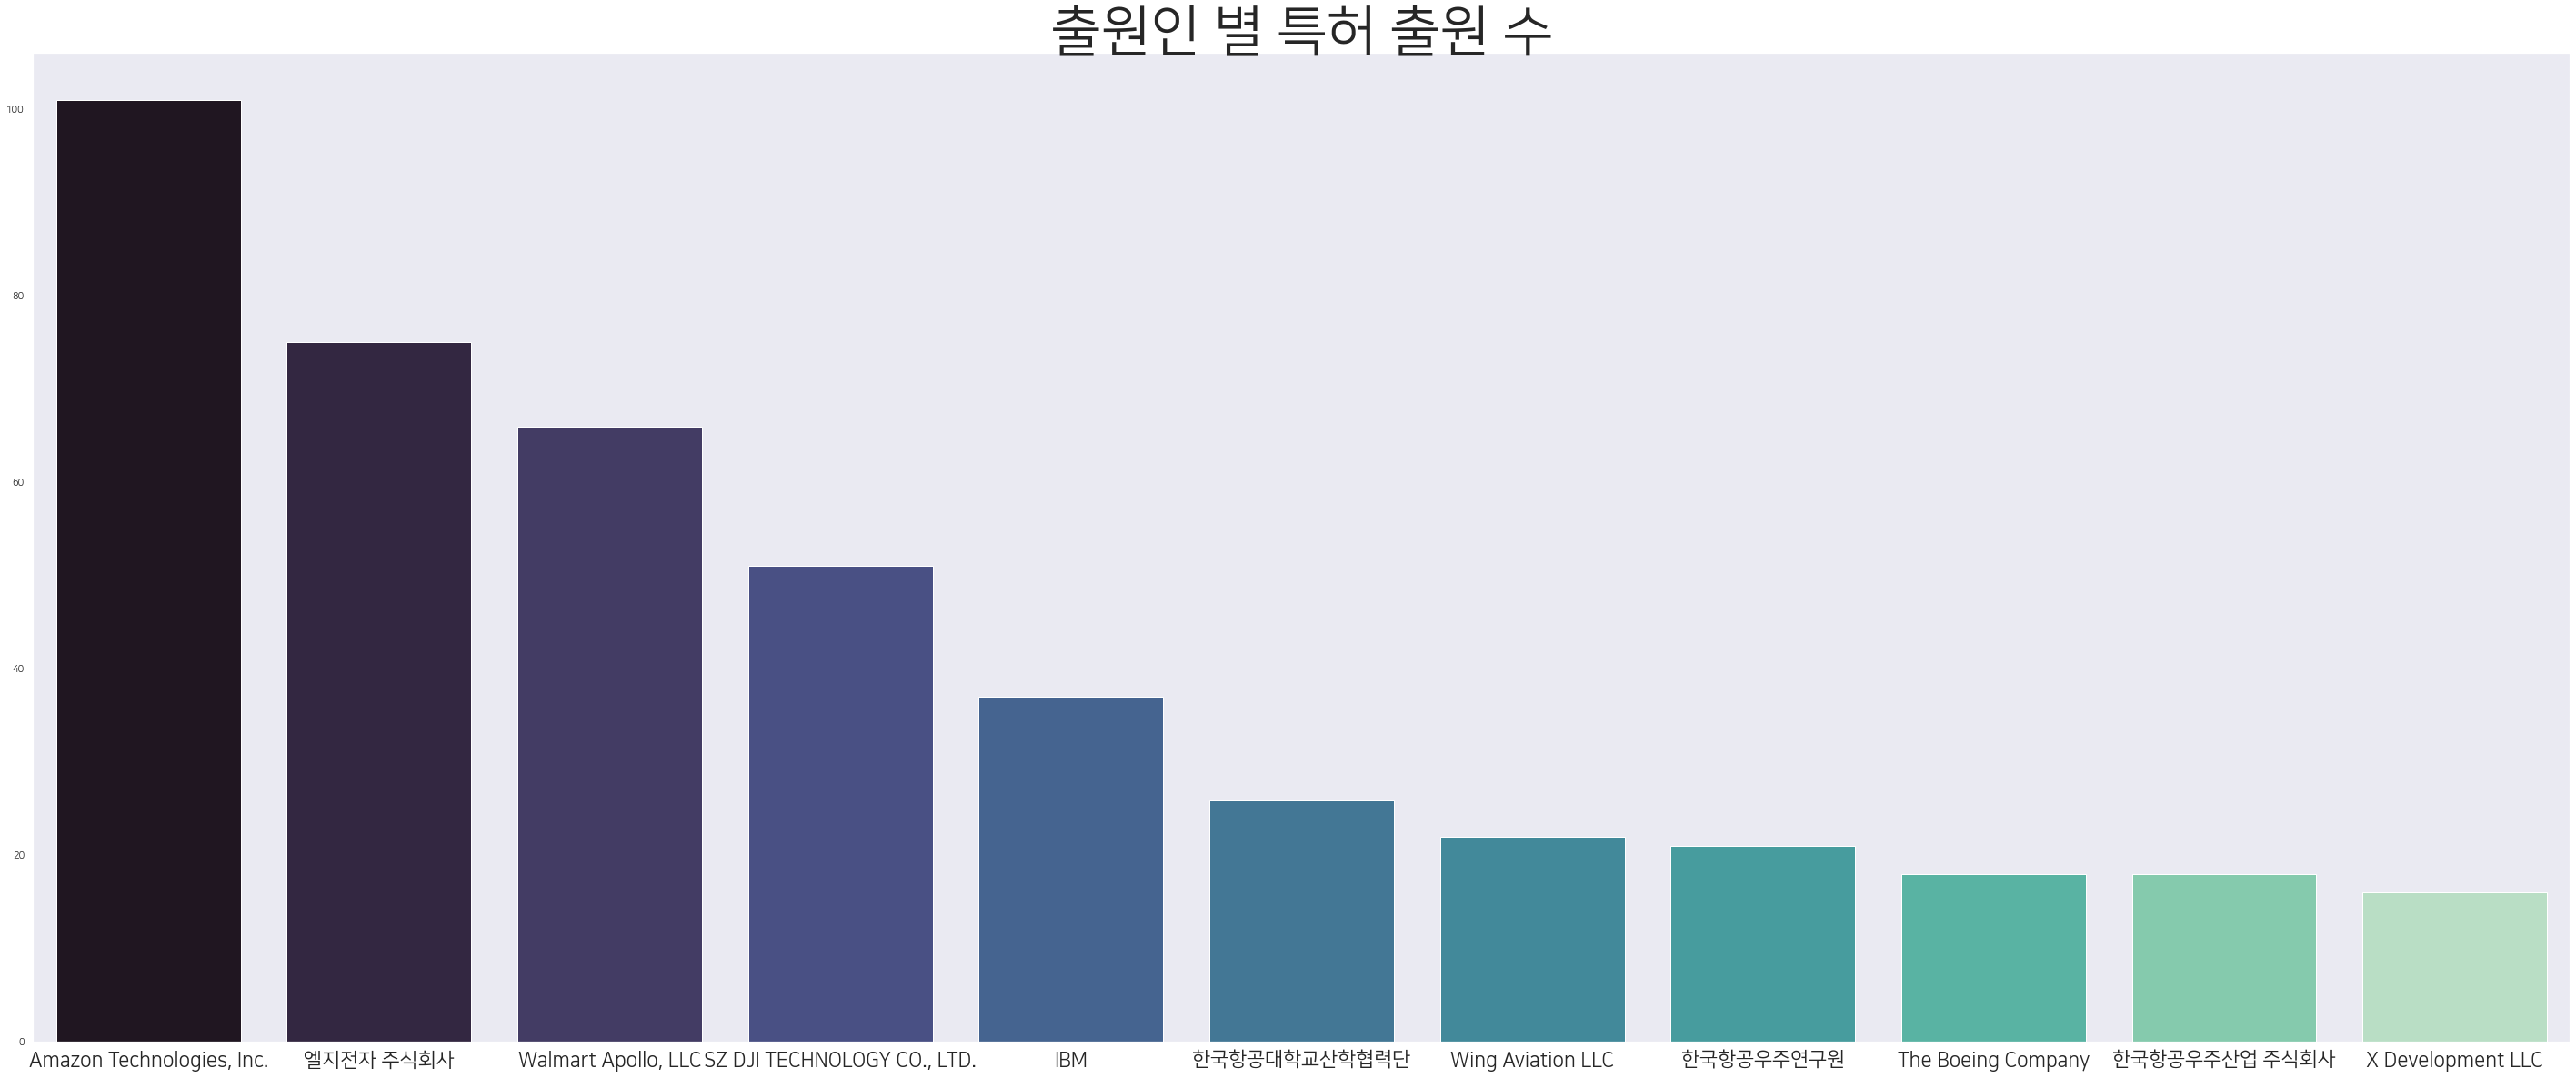

In [ ]:
#sns.set(style = 'whitegrid')

plt.rcParams['font.family'] = 'NanumSquare'
plt.rcParams['figure.figsize'] = 50,20
ax=plt.subplots()
ax=sns.barplot(x='company',y='cnt',data=df, palette="mako")
plt.title('출원인 별 특허 출원 수', size = 60)
plt.xticks(rotation =0, size = 22)
plt.xlabel('', size = 100)
plt.ylabel('', size = 20)

In [ ]:
patent = df_train.copy()

df_ep=patent[patent['국가코드']=='EP']
df_kr=patent[patent['국가코드']=='KR']
df_jp=patent[patent['국가코드']=='JP']

In [ ]:
list_file=df_kr['독립항'].reset_index()
list_file.columns = ['Prefix', 'abs']
list_file.drop(['Prefix'],axis=1,inplace=True)
kr_stop_wd=['상기','제2','것을','발명은','발명의','따라','있도록','포함하는','한다','발명에','있도록','단계','위한','통해','관한','또는','것으로','의해있다','보다','포함하고','이용하여','포함하여','하나의','제1',
            '이를','따른','있다','적어도','것이다','포함','특징으로','의해','하는','설치되어','구비된','대한','더욱','있으며','있고','있고','이용한','가능한','방법에','청구항1','1','0','2','하며','에서','복수의','있어서',
            '경우','에','의','를','','','','',]

for i in range(0, len(kr_stop_wd)):
    for j in range(0, len(list_file)):
        list_file[j] = re.sub(kr_stop_wd[i], '', list_file[j])
list_file=list_file['abs']
corpus = list_file
tfidfv = TfidfVectorizer(min_df = 5, max_features = 400, ngram_range=(1, 3)).fit(corpus) 

print(tfidfv.vocabulary_)

{'gps': 10, '드론': 93, '본체': 155, '비행을': 167, '다수': 76, '화물': 394, '유지': 264, '구성되고': 55, '가능하도록': 13, '구비': 48, '구조': 60, '하고': 371, '안테나': 233, '33': 0, '구성되며': 57, '센서': 202, '드론 본체': 95, '내부': 72, '형성되고': 388, '구비되어': 51, '설치되는': 199, '설치되며': 200, '저장': 288, '하단': 374, '설치되고': 198, '이동': 267, '가능하게': 12, '대응': 81, '전송': 295, '작동': 282, '외부': 249, '촬영': 343, '복수': 153, '그리고': 62, '방향으로': 144, '측정': 350, '드론이': 104, '촬영된': 344, '방향을': 145, '현재': 384, '방향': 143, '데이터': 85, '송수신': 207, '드론을': 103, '수평': 220, '회전': 398, '드론과': 99, '드론은': 102, '제어': 310, '서로': 186, '각각': 17, '연결': 236, '있는': 278, '장치': 284, '상면': 175, '이루어진': 269, '프레임': 367, '설치된': 201, '하나': 372, '이상': 272, '어느': 234, '연결되어': 239, '제공': 309, '연결되는': 238, '하나 이상': 373, '위치': 254, '형성되는': 389, '형성되며': 390, '주행': 325, '결합': 32, '대응되는': 82, '결합되는': 33, '구동': 46, '청구항7': 341, '구비되며': 50, '비행': 162, '비행체': 168, '사이': 173, '무인항공기': 133, '청구항': 339, '내지': 73, '위하여': 260, '구비되는': 49, '스테이션': 223, '하부': 376, '상부': 176, '물품을': 137

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5, max_features = 400, ngram_range=(1, 3))
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)

33     15.231088
34     10.061249
35      9.933125
3d      7.366602
3차원    11.758880
         ...    
확인     11.037053
환경      6.888065
회로      6.308867
회전     24.647570
획득     14.126779
Length: 400, dtype: float64

In [ ]:
Cloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',mask=korea_coloring,width = 50, height = 50, background_color="white", max_words=80).generate_from_frequencies(df.T.sum(axis=1))
korea_color=ImageColorGenerator(korea_coloring)

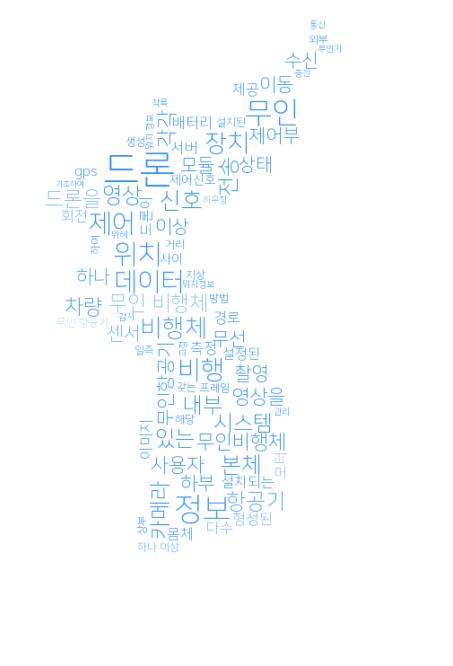

In [ ]:
#plt.rcParams['font.family'] = 'NanumSquare'
fig = plt.figure(figsize=(12, 12)) 
#.recolor(color_func=korea_color
plt.imshow(Cloud.recolor(color_func=korea_color),interpolation='bilinear')#'lanczos')
plt.axis('off')
plt.show()

In [ ]:
patent = df_train.copy()

df_ep=patent[patent['출원인']=='EP']
df_kr=patent[patent['국가코드']=='KR']
df_jp=patent[patent['국가코드']=='JP']

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [ ]:
patent.head(1)

In [ ]:
df_us=patent[patent['국가코드']=='US']
list_file=df_us['독립항'].reset_index()
list_file.columns = ['Prefix', 'abs']
list_file.drop(['Prefix'],axis=1,inplace=True)


In [ ]:
en_stop_wd=['the','configured','to','at least one','on','that','and','from','least one','is','by the','one or more','with in','for','more','by','of','plurality','an','of','based','with','wherein','said','compring','at','secd',
            'dre','in','first','or','da','wg','pti','mi','each','ctaer','housg','ter','mes','as','sti','havg','pim','le','ce','do','trs','cfiguri','diffeasrent','different','between','','','','','','','','','','',]

for i in range(0, len(en_stop_wd)):
    for j in range(0, len(list_file)):
        list_file[j] = re.sub(kr_stop_wd[i], '', list_file[j])

list_file['abs']=list_file['abs'].str.replace('trspt','transportation')
list_file['abs']=list_file['abs'].str.replace('receivg','receiving')
list_file['abs']=list_file['abs'].str.replace('cludg','cluding')
list_file['abs']=list_file['abs'].str.replace('netwk','network')
list_file['abs']=list_file['abs'].str.replace('carryg','carry')
list_file['abs']=list_file['abs'].str.replace('precess','process')
list_file['abs']=list_file['abs'].str.replace('loci','location')
list_file['abs']=list_file['abs'].str.replace('ctrol','control')
list_file['abs']=list_file['abs'].str.replace('mechm','mechanism')
list_file['abs']=list_file['abs'].str.replace('sens','sensor')
list_file['abs']=list_file['abs'].str.replace('positi','position')
list_file['abs']=list_file['abs'].str.replace('desti','destination')


In [ ]:
list_file=list_file['abs']
corpus = list_file
tfidfv = TfidfVectorizer(min_df = 5, max_features = 400, ngram_range=(1, 3)).fit(corpus) 

print(tfidfv.vocabulary_)
vectorizer = TfidfVectorizer(min_df = 5, max_features = 400, ngram_range=(1, 3))
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)

{'청구항1': 399, 'an': 11, 'apparatus': 20, 'comprising': 62, 'multi': 196, 'flight': 124, 'vehicle': 378, 'at': 28, 'least': 167, 'one': 213, 'connection': 75, 'mechanism': 184, 'to': 344, 'on': 211, 'structure': 283, 'the': 298, 'where': 386, 'is': 161, 'configured': 71, 'perform': 234, 'and': 14, 'based': 36, 'of': 202, 'wherein': 387, 'transfer': 359, 'items': 165, 'or': 220, 'information': 154, 'between': 43, 'plurality': 237, 'control': 77, 'system': 288, 'during': 116, 'payload': 233, 'are': 21, 'using': 376, 'having': 140, 'that': 295, 'when': 384, 'from': 130, 'two': 363, 'each': 117, 'along': 9, 'such': 284, 'not': 200, 'line': 172, 'at least': 29, 'least one': 170, 'to the': 354, 'is configured': 162, 'configured to': 72, 'to perform': 351, 'based on': 39, 'wherein the': 388, 'the at': 303, 'between the': 44, 'and the': 17, 'plurality of': 238, 'comprising an': 63, 'control system': 78, 'one of': 214, 'that is': 296, 'such that': 285, 'that the': 297, 'at least one': 31, 'is co

access                 5.888525
aerial                18.453984
aerial drone           4.383007
aerial vehicle        15.780706
aerial vehicle uav     7.122792
                        ...    
with the              10.249035
within                 8.116125
within the             5.602267
zone                   5.694288
청구항1                   6.084391
Length: 400, dtype: float64

In [ ]:
usa_color=ImageColorGenerator(usa_coloring)
Cloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareL.ttf'
,mask=usa_coloring, width = 50, height = 50, background_color="white", max_words=80).generate_from_frequencies(df.T.sum(axis=1))

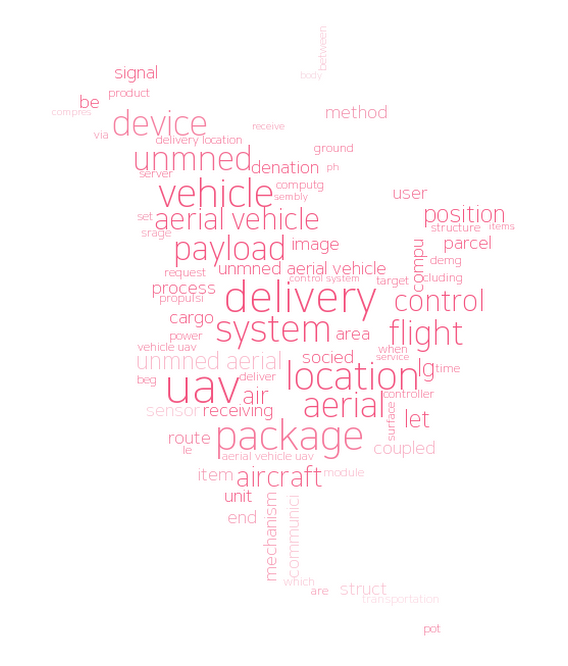

In [ ]:
#plt.rcParams['font.family'] = 'NanumSquare'
fig = plt.figure(figsize=(12, 12)) 

plt.imshow(Cloud.recolor(color_func=usa_color),interpolation='lanczos')#'lanczos')
plt.axis('off')
plt.show()

In [ ]:
patent = df_train.copy()
patent.loc[(patent['출원인']=='INTERNATIONAL BUSINESS MACHINES CORPORATION')]='International Business Machines Corporation'
patent.loc[(patent['출원인']=='월마트 아폴로, 엘 엘이디')]='Walmart Apollo, LLC'
patent.loc[(patent['출원인']=='AMAZON TECHNOLOGIES, INC.')]='Amazon Technologies, Inc.'
patent.loc[(patent['출원인']=='SZ DJI TECHNOLOGY CO LTD')]='SZ DJI TECHNOLOGY CO., LTD'
patent.loc[(patent['출원인']=='AMAZON TECHNOLOGIES INC')]='Amazon Technologies, Inc.'
patent.loc[(patent['출원인']=='Wal-Mart Stores, Inc.')]='Walmart Apollo, LLC'
patent.loc[(patent['출원인']=='THE BOEING COMPANY')]='The Boeing Company'
df_amzn=patent[patent['출원인']==('Amazon Technologies, Inc.')]
df_wm=patent[patent['출원인']==('Walmart Apollo, LLC')]

In [ ]:
list_file=df_amzn['독립항'].reset_index()
list_file.columns = ['Prefix', 'abs']
list_file.drop(['Prefix'],axis=1,inplace=True)

In [ ]:
list_file=df_wm['독립항'].reset_index()
list_file.columns = ['Prefix', 'abs']
list_file.drop(['Prefix'],axis=1,inplace=True)

In [ ]:
list_file=list_file['abs']
corpus = list_file
tfidfv = TfidfVectorizer(min_df = 5, max_features = 400, ngram_range=(1, 3)).fit(corpus) 
vectorizer = TfidfVectorizer(min_df = 5, max_features = 400, ngram_range=(1, 3))
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)

about             0.657224
above             0.639286
actual            0.644214
aerial            3.642777
aerial vehicle    3.088916
                    ...   
within            1.897634
within the        1.259496
zone              0.794147
청구항1              0.780607
청구항1 an           0.513646
Length: 400, dtype: float64

In [ ]:
usa_color=ImageColorGenerator(usa_coloring)
Cloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareL.ttf'
,mask=usa_coloring, width = 50, height = 50, background_color="white", max_words=80).generate_from_frequencies(df.T.sum(axis=1))

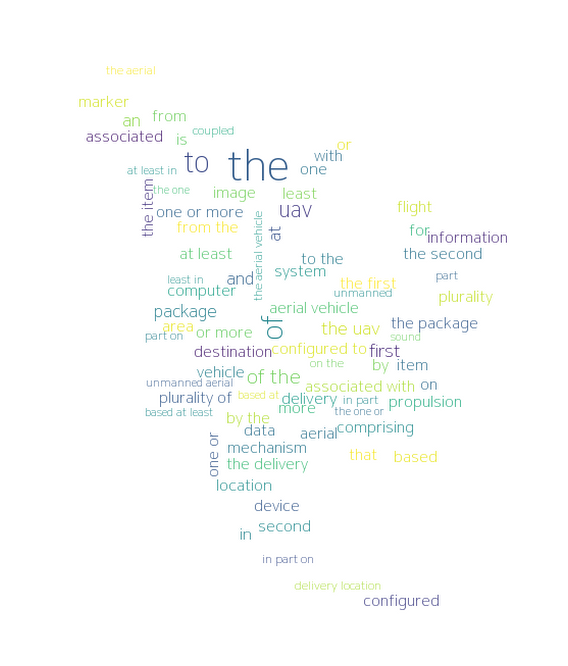

In [ ]:
#plt.rcParams['font.family'] = 'NanumSquare'
fig = plt.figure(figsize=(12, 12)) 

plt.imshow(Cloud,interpolation='lanczos')#'lanczos')
plt.axis('off')
plt.show()

In [ ]:
list_file=list_file['abs']
corpus = list_file

In [ ]:
X = tfidfv.fit_transform(corpus) # 2차원 
idx_to_vocab = list(tfidfv.vocabulary_.keys())

In [ ]:
!pip install soyclustering==0.1.0
from soyclustering import SphericalKMeans
!pip install pyLDAvis
from pyLDAvis import prepare, show
import pyLDAvis

In [ ]:
kmeans = SphericalKMeans(n_clusters = 10)
labels = kmeans.fit_predict(X)

In [ ]:
def labels_to_doc_topic_prob(labels):
    n_clusters = np.unique(labels).shape[0]
    n_docs = labels.shape[0]
    doc_topic_prob = np.zeros((n_docs, n_clusters))

    for c in range(n_clusters):
        idx = np.where(labels == c)[0]
        doc_topic_prob[idx, c] = 1

    return doc_topic_prob

def labels_x_to_topic_term_prob(labels, x):
    n_clusters = np.unique(labels).shape[0]
    n_terms = x.shape[1]

    topic_term_prob = np.zeros((n_clusters, n_terms))
    for c in range(n_clusters):
        idx = np.where(labels == c)[0]
        topic_term_freq = x[idx].sum(axis=0)
        freq_sum = topic_term_freq.sum()
        if freq_sum == 0:
            continue
        topic_term_prob[c] = topic_term_freq / freq_sum

    base = 1 / n_terms
    rowsum = topic_term_prob.sum(axis=1)
    topic_term_prob[np.where(rowsum == 0)[0]] = base

    return topic_term_prob

In [ ]:
doc_topic_prob = labels_to_doc_topic_prob(labels)
topic_term_prob = labels_x_to_topic_term_prob(labels, X)
doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)

prepared_data = prepare(
    topic_term_prob,
    doc_topic_prob,
    doc_lengths,
    idx_to_vocab,
    term_frequency,
    mds = 'tsne',
    plot_opts = {'xlab': 't-SNE1', 'ylab': 't-SNE2'}
)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:236: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:259: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:260: RuntimeWarning:

divide by zero encountered in log



In [ ]:
# LDA 시각화 html 파일로 저장

pyLDAvis.enable_notebook()
pyLDAvis.save_html(prepared_data, 'lda.html')

In [ ]:
pyLDAvis.display(prepared_data) 

In [ ]:
from gensim.models import Word2Vec, FastText, Doc2Vec

In [ ]:
%%time
model_w2v = embedding_model = Word2Vec(corpus, size=100, window = 5, min_count=10,  
                           workers=12, iter=500, hs=0, sg=1)

CPU times: user 23.7 s, sys: 1.09 s, total: 24.7 s
Wall time: 15.5 s


In [ ]:
model_w2v.save('word2vec ver2.0 (iter500).model')

In [ ]:
model_test = Word2Vec.load('word2vec ver2.0 (iter500).model')

In [ ]:
model_test.wv.vocab

In [ ]:
!pip install bertopic[all]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df_kr['요약'])
text = tfidf.transform(df_kr['요약'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


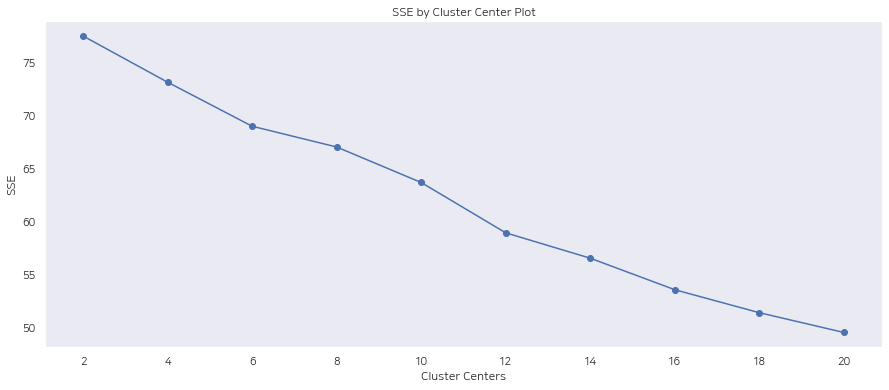

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



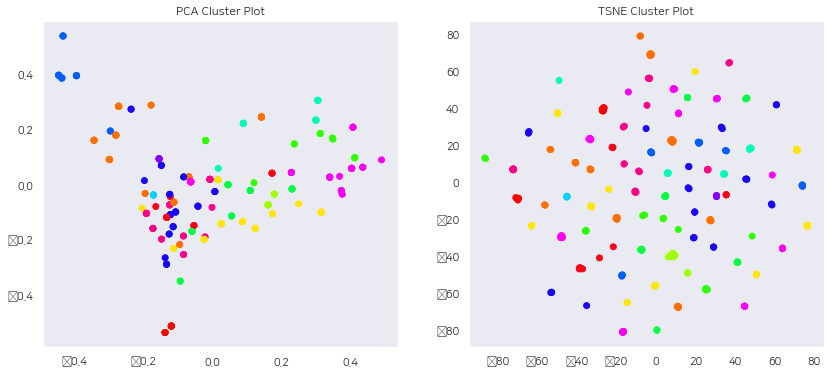

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
통해,다양한,것으로,의해,드론의,있어,드론,갖는,배터리를,배터리

Cluster 1
상기,있다,정보를,경우,배송,물품의,물품,물품을,장치,드론

Cluster 2
가능하게,것이다,발명은,서비스,드론에,원하는,있는,관한,상기,구비된

Cluster 3
11,시스템에,수신하는,통신하는,30,드론이,베이스,상기,경우,소정의

Cluster 4
전달,설치되어,따라,요청,택배,단계,목적지,제1,제2,상기

Cluster 5
것으로,안전하게,드론으로,드론에,착륙,드론을,상기,화물을,화물,드론의

Cluster 6
실시예에,시스템은,포함할,단계,물품을,이용한,물류,드론을,배송,상기

Cluster 7
이동,위치로,정보를,드론이,대한,통해,위치에,원하는,전달하는,요청

Cluster 8
구성되는,정보를,물품을,드론에,신호를,정보,물품,배송용,상호,배송

Cluster 9
단계,특히,발명에,발명은,시스템을,상하,있다,이용한,드론,드론을

Cluster 10
설정된,드론의,드론이,물품을,물품,포함된,사용자,경우,단계,무인

Cluster 11
내부에,또는,있게,특징으로,상태로,발명은,드론,드론의,내부,상기

Cluster 12
위한,시스템에,정보를,정보,통해,물류,있는,드론은,배달,또는

Cluster 13
상기,물품의,것이다,물건을,여러,하여,적어도,드론,무인,고정


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df_us['요약'])
text = tfidf.transform(df_us['요약'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


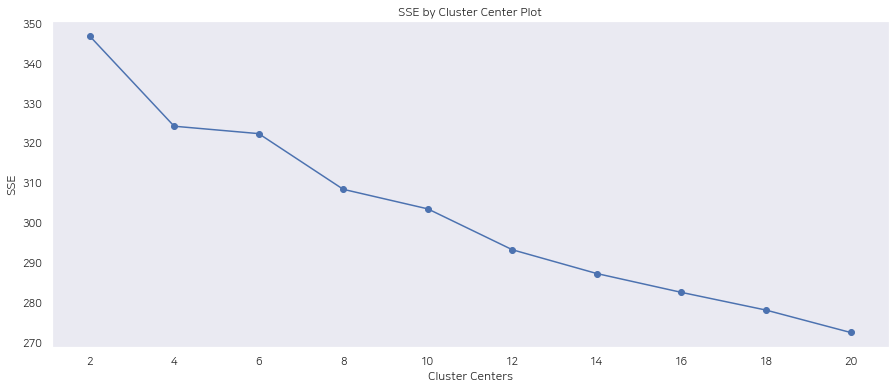

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



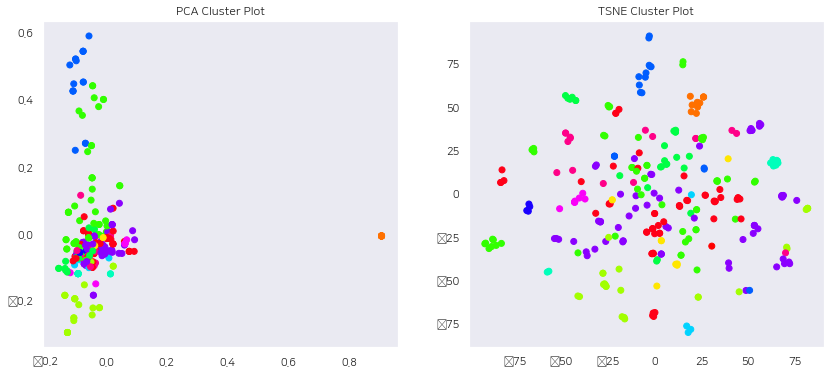

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
additional,frame,selected,based,parameters,fulfillment,uav,identifier,particular,item

Cluster 1
configured,includes,systems,support,computing,parcel,carrier,entities,uav,chassis

Cluster 2
materials,deliver,facility,destination,specified,delivery,ordered,items,inventory,user

Cluster 3
lower,line,release,tether,delivery,housing,assembly,uav,ground,payload

Cluster 4
aerial,drones,air,vehicle,area,drone,location,uav,package,delivery

Cluster 5
based,associated,vehicle,second,unmanned,set,autonomous,navigation,image,data

Cluster 6
verification,processed,sensor,flight,calibration,transportation,measurements,variation,apparatus,information

Cluster 7
frame,current,electric,load,second,assembly,source,vehicle,transmission,power

Cluster 8
aerial,vehicle,delivery,descent,configured,receiving,chamber,unit,uav,package

Cluster 9
interacting,client,updates,graphic,functionality,larger,fulfilling,facing,transport,items

Cluster 10
includes,components,aerial,noise,configured,controll